In [4]:
from matplotlib import pyplot as plt

In [5]:
%matplotlib notebook

In [47]:

from dgsres import icg
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)


In [59]:

import numpy as np
def linear(a0, a1):
    return lambda E: a0 + a1*E

def parabolic(a0, a1, a2):
    return lambda E: a0 + a1*E + a2*E*E

a0_a = 0.220735832594
a1_a = -0.0012356210013
a2_a = -4.86453189362e-06
a0_b = 0.0476677481103
a1_b = -0.000415707214915
a2_b = 1.92210604173e-07
from numpy import array
x_t0 = array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120., 130.])
y_t0 = array([   5.74030747,    6.17078063,    6.60218515,    7.19238872,
          7.91124324,    9.02569315,   10.53174808,   12.61032027,
         15.78117089,   21.19391277,   30.7701625 ,   56.60375125,  100. , 300      ])

x_sigma = array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120., 130.])
y_sigma = array([  2.56952213,   2.62595814,   2.74551247,   2.86743246,
         3.02381235,   3.16348315,   3.32458451,   3.65308239,
         3.84840911,   4.49697484,   5.80173869,   8.62287841,  20.  , 100    ])

def positive(f):
    def _(x):
        t = f(x)
        try:
            t[t<0] = 0
            return t
        except:
            if t<0: t = 0
            return t
    return _

interped_funcs = dict(
    a = positive(parabolic(a0_a, a1_a, a2_a)),
    b = positive(parabolic(a0_b, a1_b, a2_b)),
    t0 = lambda E: np.interp(E, x_t0, y_t0),
    sigma = lambda E: np.interp(E, x_sigma, y_sigma),
    R = lambda E: 0*E+ 0.3, 
)

<IPython.core.display.Javascript object>


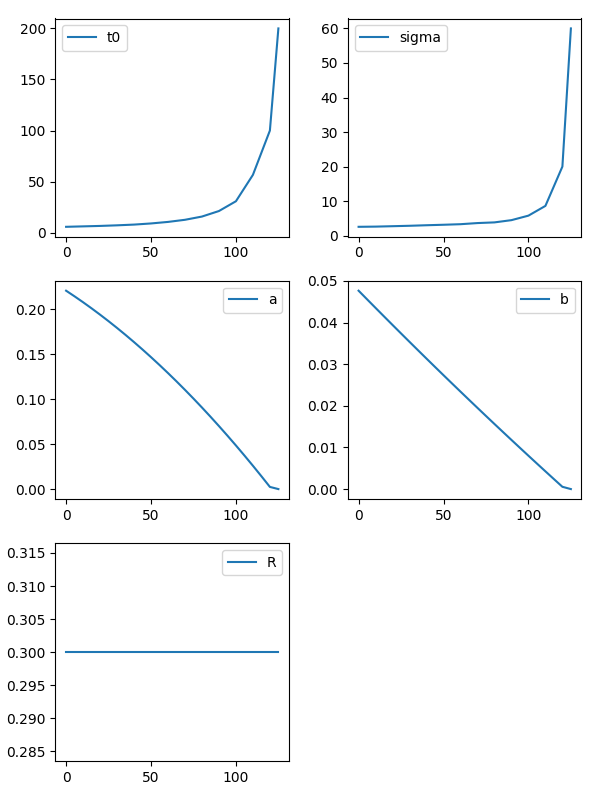

In [60]:
variables = 't0 sigma a b R'.split()
plt.figure(figsize=(6,8))

for i,v in enumerate(variables):
    plt.subplot(3, 2, i+1)
    x = np.arange(0, 130., 5.)
    y2 = interped_funcs[v](x)
    plt.plot(x, y2, label=v)
    plt.legend()
    continue

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


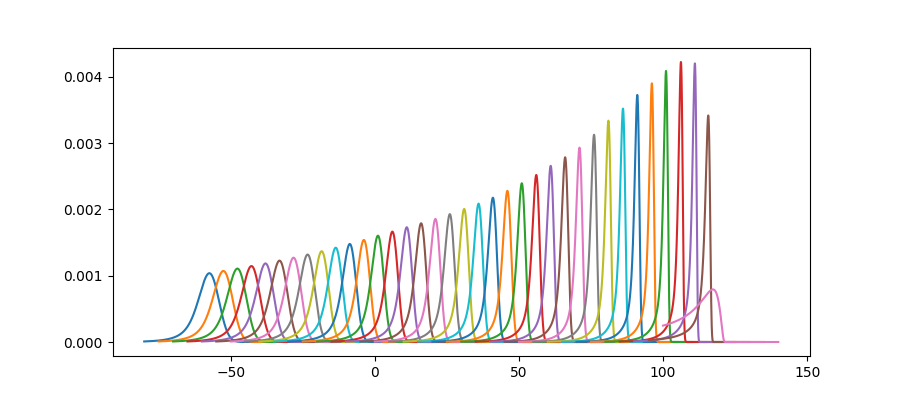

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide


In [62]:
plt.figure(figsize=(9, 4))
for E0 in np.arange(-60., 130., 5.):
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    x = np.arange(E0-20, E0+20, .01)
    y = icg.resolution(x, Ei=130., E0=E0, geom=geom, **params)
    y/=y.sum()
    # plt.errorbar(x, y0, y0err)
    plt.plot(x, y)
plt.show()

In [68]:
def fwhm(E0):
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    x = np.arange(E0-20, E0+20, .01)
    y = icg.resolution(x, Ei=130., E0=E0, geom=geom, **params)
    max = np.max(y)
    hmax = max/2
    top = y>hmax
    # print hmax
    # print top
    topx = x[top]
    return topx[-1]-topx[0]

In [69]:
fwhms = [fwhm(E) for E in np.arange(-60, 105., 5)]

<IPython.core.display.Javascript object>


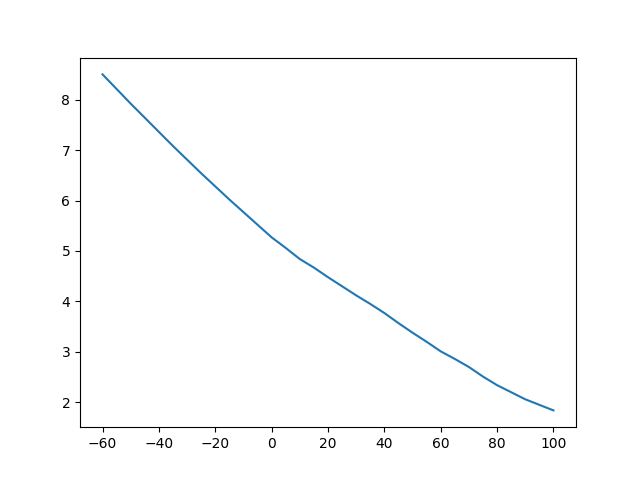

In [70]:
plt.figure()
plt.plot(np.arange(-60, 105., 5), fwhms)

In [ ]:
def psf(E_over_Ei):
    

In [ ]:
plt.figure(figsize=(9, 4))
for E0 in np.arange(-60., 130., 5.):
    params = dict()
    for name in interped_funcs.keys():
        value = interped_funcs[name](E0)
        params[name] = value
    x = np.arange(E0-50, E0+50, .01)
    y = icg.resolution(x, Ei=130., E0=E0, geom=geom, **params)
    y/=y.sum()
    # plt.errorbar(x, y0, y0err)
    plt.plot(x, y)
plt.show()